In [182]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2)
plt.rc('hatch', color='black', linewidth=0.5)


warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/paper/experiment_workloads/reuse/results'

In [183]:
reuse = pd.read_csv(ROOT_RESULT_FOLDER+'/run_times_same_workload.csv', header=None, names=['exp_id', 'execution', 'repo','script_name','type','run_time'])

In [235]:
def plot_executions_reuse(df, loc): 
    cat = sns.catplot(data=reuse,x='execution', y ='run_time',
                      hue='type', kind='bar', legend=False)
    cat.set_axis_labels('Execution Number', 'Run Time (s)')

    num_executions = len(reuse.execution.unique())
    hatches = iter(['+','//'])

    for i, bar in enumerate(cat.ax.patches):
        if i % num_executions == 0:
            hatch = next(hatches)
        bar.set_edgecolor('black')
        bar.set_hatch(hatch)
    plt.gca().legend().set_title('')
    plt.legend(loc='upper right', labelspacing=0)
    cat.savefig(loc)

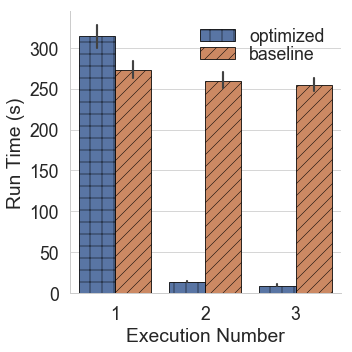

In [237]:
# Plot and store results for running the intro to manual feature engineering 3 times back to back
plot_executions_reuse(reuse[reuse['script_name'] == 'introduction_to_manual_feature_engineering'], 
                     '../../../../../papers/images/experiment-results/reuse/kaggle-repeated-workloads/intro-to-manual-feature-engineering.pdf')